## Plotting the Collective Variable values from Custom Force simulations

In [6]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
import pandas as pd
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [7]:
work_dir = '/home/eva/Documents/gbsa-sims/cv-sims/individual_harmonic_potentials/'

In [8]:
top_dir = '/home/eva/Documents/structures/structures-obc2-ff96/tet_L24E/GLU/'

In [ ]:
system_name = 'k = 100 kJ/mol$(nm)^2$, $r_0$ = 40 nm'

Loading the text files with the CV values onto dataframes

In [10]:
colnames = ['cv']

In [11]:
df1 = pd.read_csv(work_dir+'cvind-17/tet_L24E/GLU/cv-values.txt', names=colnames, dtype=object)

df2 = pd.read_csv(work_dir+'cvind-17/tet_L24E/GLU/cv-linalg.txt', names=colnames, dtype=object)

In [ ]:
cv_sim = []
cv_linalg = []

for val in df1['cv']:
    cv_sim.append(float(val))


for cvval in df2['cv']:
    cv_linalg.append(float(cvval))

Plotting the CV values vs simulation time, excluding first 20 ns (5000 frames):

In [22]:
t = np.arange(20.0, 200.0, 0.004)

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, cv_sim[5000:], color = 'seagreen')
ax.set(xlabel='time (ns)', ylabel='CV (nm)', title = system_name)

ax.grid()
ax.set_xlim([0.0, 210.0])
ax.set_ylim([230.0, 250.0])

#ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'cvind-17/tet_L24E/GLU/analysis/cv-sim.png', bbox_inches='tight')
plt.show()

Comparing the simulation CV values with the calculated CV values:

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, cv_linalg[5000:], label = 'calculation', color = 'darkviolet')
ax.plot(t, cv_sim[5000:], label = 'simulation', color = 'seagreen')

ax.set(xlabel='time (ns)', ylabel='CV (nm)', title = system_name)
ax.grid()
ax.set_xlim([0.0, 210.0])
ax.set_ylim([230.0, 250.0])

ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'cvind-17/tet_L24E/GLU/analysis/cv-plot.png', bbox_inches='tight')
plt.show()

Plotting the difference between the CV values from the simulation and the calculation:

In [ ]:
idx = 0
diff =[]

for idx in range(len(cv_sim)):
    diff.append(cv_sim[idx]-cv_linalg[idx])
    idx+=1

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, diff[5000:], color = 'navy')
ax.set(xlabel='time (ns)', ylabel='CV difference (nm)', title = system_name)
ax.grid()
ax.set_xlim([0.0, 210.0])
ax.set_ylim([-1.0, 1.0])

fig.savefig(work_dir+'cvind-17/tet_L24E/GLU/analysis/cv-diff.png')
plt.show()

### Comparing simulations with same k but different r0

In [44]:
spring_constant = 'k = 100 kJ/mol$(nm)^2$'

In [45]:
w1 = work_dir+'cvind-7/tet_L24E/GLU/'
w2 = work_dir+'cvind-8/tet_L24E/GLU/'
w3 = work_dir+'cvind-9/tet_L24E/GLU/'
w4 = work_dir+'cvind-14/tet_L24E/GLU/'
w5 = work_dir+'cvind-15/tet_L24E/GLU/'
w6 = work_dir+'cvind-16/tet_L24E/GLU/'
w7 = work_dir+'cvind-17/tet_L24E/GLU/'

In [46]:
dat1 = pd.read_csv(w1+'cv-values.txt', names=colnames, dtype=object)
dat2 = pd.read_csv(w2+'cv-values.txt', names=colnames, dtype=object)
dat3 = pd.read_csv(w3+'cv-values.txt', names=colnames, dtype=object)
dat4 = pd.read_csv(w4+'cv-values.txt', names=colnames, dtype=object)
dat5 = pd.read_csv(w5+'cv-values.txt', names=colnames, dtype=object)
dat6 = pd.read_csv(w6+'cv-values.txt', names=colnames, dtype=object)
dat7 = pd.read_csv(w7+'cv-values.txt', names=colnames, dtype=object)

In [47]:
cv_sim1 = []
cv_sim2 = []
cv_sim3 = []
cv_sim4 = []
cv_sim5 = []
cv_sim6 = []
cv_sim7 = []

for val in dat1['cv']:
    cv_sim1.append(float(val))

for val in dat2['cv']:
    cv_sim2.append(float(val))
    
for val in dat3['cv']:
    cv_sim3.append(float(val))
    
for val in dat4['cv']:
    cv_sim4.append(float(val))

for val in dat5['cv']:
    cv_sim5.append(float(val))
    
for val in dat6['cv']:
    cv_sim6.append(float(val))
    
for val in dat7['cv']:
    cv_sim7.append(float(val))

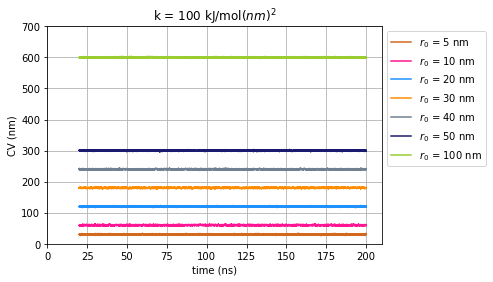

In [49]:
fig,ax = plt.subplots()
ax.plot(t, cv_sim1[5000:], label = '$r_0$ = 5 nm',color = 'chocolate')
ax.plot(t, cv_sim4[5000:], label = '$r_0$ = 10 nm', color = 'deeppink')
ax.plot(t, cv_sim5[5000:], label = '$r_0$ = 20 nm', color = 'dodgerblue')
ax.plot(t, cv_sim6[5000:], label = '$r_0$ = 30 nm', color = 'darkorange')
ax.plot(t, cv_sim7[5000:], label = '$r_0$ = 40 nm', color = 'slategrey')
ax.plot(t, cv_sim2[5000:], label = '$r_0$ = 50 nm', color = 'midnightblue')
ax.plot(t, cv_sim3[5000:], label = '$r_0$ = 100 nm', color = 'yellowgreen')


ax.set(xlabel='time (ns)', ylabel='CV (nm)', title = spring_constant)

ax.grid()
ax.set_xlim([0.0, 210.0])
ax.set_ylim([0.0, 700.0])

ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'overall_analysis/k_100/cv.png', bbox_inches='tight')
plt.show()